# CS4650 Capstone: Kaggle Competition - Spaceship Titanic

Author: Tommy James

Model: SVM

In [209]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Set plot style
sns.set_theme(style='whitegrid')

# Load the dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Make copies of the dataframes
train_original = train_df.copy(deep=True)
test_original = test_df.copy(deep=True)


## Explore the dataset

* Print information about the dataset such as shape and data types
* Display the first few rows of the dataset


In [210]:
print("Training Data:")
print("Shape:", train_df.shape)
print(train_df.info())
train_df.head()

Training Data:
Shape: (8693, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [211]:
print("Testing Data:")
print("Shape:", test_df.shape)
print(test_df.info())
test_df.head()

Testing Data:
Shape: (4277, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB
None


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [212]:
# Count missing values per column for training data
print("Missing values in training data:")
train_df.isnull().sum()

Missing values in training data:


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [213]:
# Target variable distribution
print("\nTarget distribution:\n", train_df['Transported'].value_counts(normalize=True))


Target distribution:
 Transported
True     0.503624
False    0.496376
Name: proportion, dtype: float64


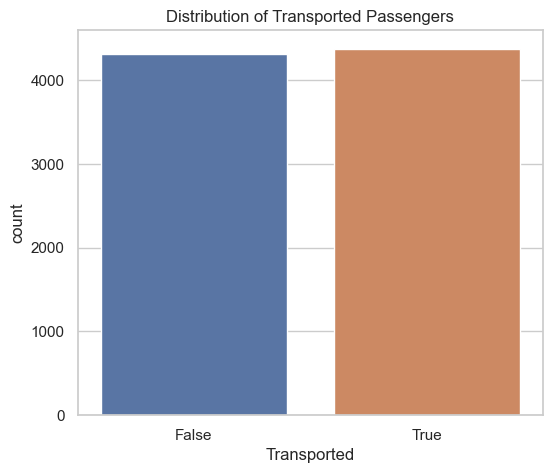

In [214]:
# Plot the distribution of the target variable
plt.figure(figsize=(6, 5))
sns.countplot(data=train_df, x='Transported', hue='Transported', legend=False)

# Add labels
plt.title('Distribution of Transported Passengers')
plt.show()


## Handle missing values

In [215]:
# Training data preprocessing
# Numerical fill with 0 (for spending-related columns)
spending_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train_df[spending_cols] = train_df[spending_cols].fillna(0)

# Fill age with median
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())

# Fill categorical and boolean columns with mode
for col in ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])

# For Cabin, extract deck/side, then fill missing with 'Unknown' or median
train_df['Deck'] = train_df['Cabin'].str.split('/').str[0]
train_df['Side'] = train_df['Cabin'].str.split('/').str[-1]
train_df['CabinNum'] = train_original['Cabin'].str.split('/').str[1].astype('float')

train_df['Deck'] = train_df['Deck'].fillna('Unknown')
train_df['Side'] = train_df['Side'].fillna('Unknown')
train_df['CabinNum'] = train_df['CabinNum'].fillna(train_df['CabinNum'].median())

# Drop Name and Cabin
train_df.drop(columns=['Name', 'Cabin'], inplace=True)

/var/folders/q5/wktr3qv13xngwgk071rr02h00000gn/T/ipykernel_88208/2023181494.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df[col] = train_df[col].fillna(train_df[col].mode()[0])


In [216]:
# Testing data preprocessing
# Use the same spending columns
spending_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
test_df[spending_cols] = test_df[spending_cols].fillna(0)

# Fill Age with median from train set
test_df['Age'] = test_df['Age'].fillna(train_df['Age'].median())

# Fill categorical and boolean columns with mode from train set
for col in ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']:
    test_df[col] = test_df[col].fillna(train_df[col].mode()[0])

# Extract Deck and Side from Cabin, fill with 'Unknown' or median
test_df['Deck'] = test_df['Cabin'].str.split('/').str[0]
test_df['Side'] = test_df['Cabin'].str.split('/').str[-1]
test_df['CabinNum'] = test_original['Cabin'].str.split('/').str[1].astype('float')

test_df['Deck'] = test_df['Deck'].fillna('Unknown')
test_df['Side'] = test_df['Side'].fillna('Unknown')
test_df['CabinNum'] = test_df['CabinNum'].fillna(test_df['CabinNum'].median())

# Drop Name and Cabin
test_df.drop(columns=['Name', 'Cabin'], inplace=True)


/var/folders/q5/wktr3qv13xngwgk071rr02h00000gn/T/ipykernel_88208/2360165949.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df[col] = test_df[col].fillna(train_df[col].mode()[0])


### Check updated dataframes

In [217]:
# check for missing values
print("Missing values in training data after preprocessing:")
print(train_df.isnull().sum())

Missing values in training data after preprocessing:
PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Side            0
CabinNum        0
dtype: int64


In [218]:
print("\nMissing values in testing data after preprocessing:")
print(test_df.isnull().sum())


Missing values in testing data after preprocessing:
PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Deck            0
Side            0
CabinNum        0
dtype: int64


## Feature Encoding

Machine learning models like SVMs need numerical input.

One-hot encode categorical variables like:
* HomePlanet, Destination, Deck, Side
* Convert Boolean columns (CryoSleep, VIP, Transported) to integers (0/1)

In [219]:
# Boolean columns to int
bool_cols = ['CryoSleep', 'VIP']
train_df[bool_cols] = train_df[bool_cols].astype(int)
test_df[bool_cols] = test_df[bool_cols].astype(int)

In [220]:
# One-hot encoding for categorical variables
categorical_cols = ['HomePlanet', 'Deck', 'Side', 'Destination']
train_df = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)
test_df = pd.get_dummies(test_df, columns=categorical_cols, drop_first=True)

# Ensure both dataframes have the same columns
# get_dummies can sometimes create mismatched columns between train/test sets
train_df, test_df = train_df.align(test_df, join='left', axis=1, fill_value=0)

# Check the final shape of the dataframes
print("Final training data shape:", train_df.shape)
print("Final testing data shape:", test_df.shape)

Final training data shape: (8693, 25)
Final testing data shape: (4277, 25)


## Scaling numerical features

Scale the numerical features, which is especially important for SVMs since they’re distance-based models and sensitive to feature magnitude.

In [221]:
# Scale features using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_cols = [
    'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 
    'Spa', 'VRDeck', 'CabinNum'
]

# Fit on train set only
train_df[numeric_cols] = scaler.fit_transform(train_df[numeric_cols])

# Use same transformation on test set
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])


## Train the SVM model

In [222]:
# Split into train and validation sets
from sklearn.model_selection import train_test_split

# Define features and target variable
X = train_df.drop(columns=['Transported'])
y = train_df['Transported']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [223]:
from sklearn.svm import SVC

# Create the model
svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)

# Train it
svm_clf.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [224]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict
y_pred = svm_clf.predict(X_val)

# Evaluate
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))

Accuracy: 0.5451408855664175

Classification Report:
               precision    recall  f1-score   support

       False       0.54      0.57      0.55       863
        True       0.55      0.52      0.54       876

    accuracy                           0.55      1739
   macro avg       0.55      0.55      0.54      1739
weighted avg       0.55      0.55      0.54      1739


Confusion Matrix:
 [[492 371]
 [420 456]]


### Plot Confusion Matrix

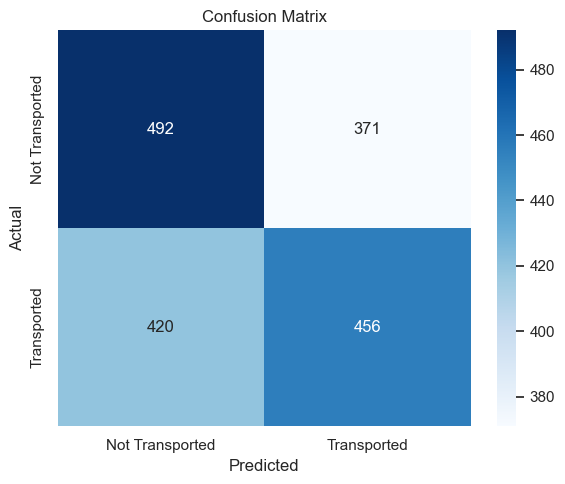

In [225]:
# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Transported", "Transported"], yticklabels=["Not Transported", "Transported"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [226]:
# Drop Transported if it exists in test_df
if 'Transported' in test_df.columns:
    test_df = test_df.drop(columns=['Transported'])

# Predict on test data
test_preds = svm_clf.predict(test_df)

# Predict probabilities
test_probs = svm_clf.predict_proba(test_df)[:, 1]

## Improving the model

The model isn't performing well so I will try to improve it using feature engineering

Text(0.5, 1.0, 'Distribution of Total Spending')

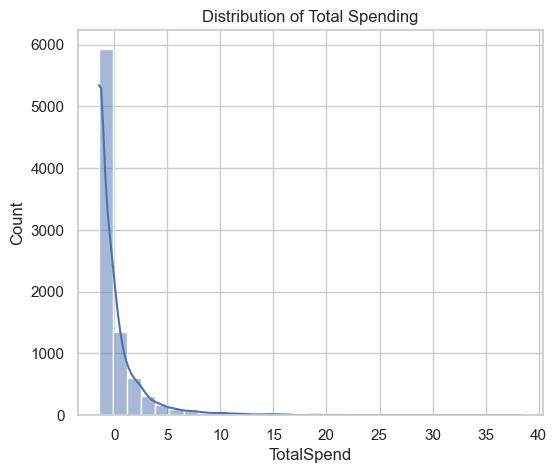

In [227]:
# Aggregate amenity spending into a single column
spend_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train_df['TotalSpend'] = train_df[spend_cols].sum(axis=1)
test_df['TotalSpend'] = test_df[spend_cols].sum(axis=1)

# Plot spending distribution
plt.figure(figsize=(6, 5))
sns.histplot(train_df['TotalSpend'], bins=30, kde=True)
plt.title('Distribution of Total Spending')

Text(0.5, 1.0, 'Distribution of Group Sizes in Training Data')

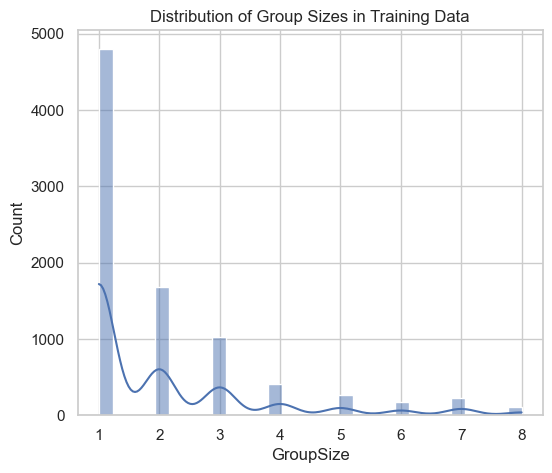

In [228]:
# PassengerId is in the format group_id_passenger_num — let’s use it to find group size:

# Extract group ID
train_df['Group'] = train_df['PassengerId'].str.split('_').str[0]
test_df['Group'] = test_df['PassengerId'].str.split('_').str[0]

# Compute group sizes
group_sizes_train = train_df['Group'].value_counts()
group_sizes_test = test_df['Group'].value_counts()

train_df['GroupSize'] = train_df['Group'].map(group_sizes_train)
test_df['GroupSize'] = test_df['Group'].map(group_sizes_test)

# Plot group size distribution
plt.figure(figsize=(6, 5))
sns.histplot(train_df['GroupSize'], bins=30, kde=True)
plt.title('Distribution of Group Sizes in Training Data')


Text(0.5, 1.0, 'Distribution of Solo Travelers')

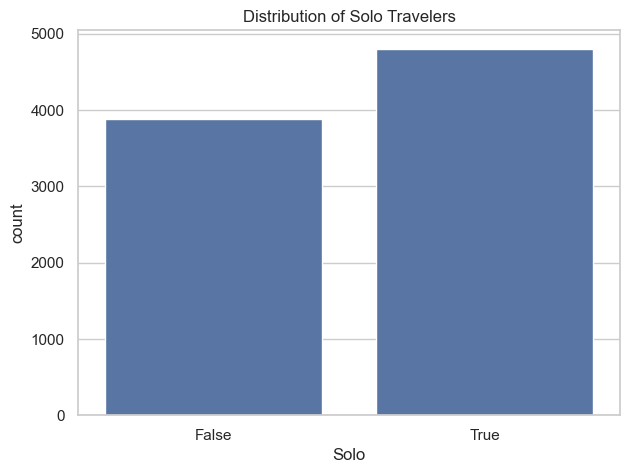

In [229]:
# Identify solo travelers
train_df['Solo'] = train_df['GroupSize'] == 1
test_df['Solo'] = test_df['GroupSize'] == 1

# Check the distribution of solo travelers
plt.figure(figsize=(7, 5))
sns.countplot(data=train_df, x='Solo')
plt.title('Distribution of Solo Travelers')

In [230]:
# Clean up group column
train_df.drop(columns=['Group'], inplace=True)
test_df.drop(columns=['Group'], inplace=True)

### Re-scale the numeric features to include new ones

In [231]:
numeric_cols = [
    'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 
    'Spa', 'VRDeck', 'CabinNum', 'TotalSpend', 'GroupSize', 'Solo'
]

# Re-apply StandardScaler
scaler = StandardScaler()

# Fit and transform on train set
train_df[numeric_cols] = scaler.fit_transform(train_df[numeric_cols])

# Transform on test set
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])

### Train the model

In [232]:
# Separate features and target again
X = train_df.drop('Transported', axis=1)
y = train_df['Transported']

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create and train the SVM model
svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
svm_clf.fit(X_train, y_train)

# Predict on validation set
y_pred = svm_clf.predict(X_val)

# Evaluate performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))

Accuracy: 0.5451408855664175

Classification Report:
               precision    recall  f1-score   support

       False       0.54      0.57      0.55       863
        True       0.55      0.52      0.54       876

    accuracy                           0.55      1739
   macro avg       0.55      0.55      0.54      1739
weighted avg       0.55      0.55      0.54      1739


Confusion Matrix:
 [[492 371]
 [420 456]]


## Feature Selection

* The model didn't improve when using feature engineering 
* I will try tree-based feature selection using Random Forest to get feature importance

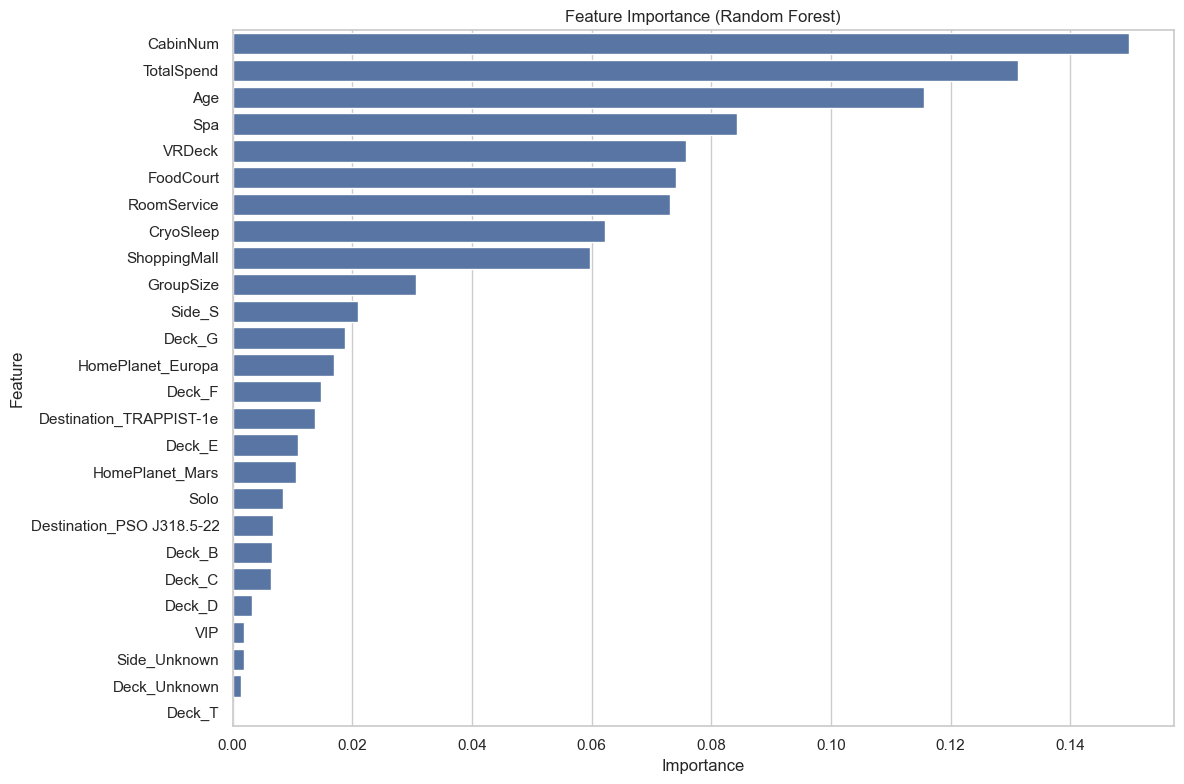

                      Feature  Importance
8                    CabinNum    0.149822
23                 TotalSpend    0.131233
1                         Age    0.115504
6                         Spa    0.084217
7                      VRDeck    0.075769
4                   FoodCourt    0.074059
3                 RoomService    0.073024
0                   CryoSleep    0.062159
5                ShoppingMall    0.059729
24                  GroupSize    0.030739
19                     Side_S    0.021008
16                     Deck_G    0.018785
9           HomePlanet_Europa    0.016945
15                     Deck_F    0.014741
22    Destination_TRAPPIST-1e    0.013828
14                     Deck_E    0.010952
10            HomePlanet_Mars    0.010605
25                       Solo    0.008495
21  Destination_PSO J318.5-22    0.006782
11                     Deck_B    0.006545
12                     Deck_C    0.006472
13                     Deck_D    0.003252
2                         VIP    0

In [246]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Train a RandomForestClassifier to compute feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to view feature importance
features = X_train.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()

# Display top 10 important features
print(importance_df)


### Select features with an importance > 0.01

In [251]:
# Select features with importance > 0.01 and exclude 'PassengerId'
selected_features = importance_df[
    (importance_df['Importance'] > 0.01) & 
    (importance_df['Feature'] != 'PassengerId')
]['Feature'].tolist()

# Subset the training and test data to include only selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_val[selected_features]

# Train the model (e.g., SVM) using selected features
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm.fit(X_train_selected, y_train)

# Make predictions and evaluate
y_pred_selected = svm.predict(X_test_selected)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_val, y_pred_selected))

              precision    recall  f1-score   support

       False       0.79      0.79      0.79       863
        True       0.79      0.79      0.79       876

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



### Plot the confusion matrix

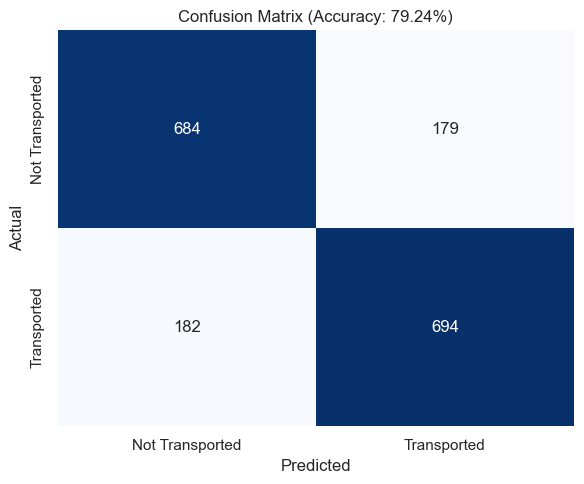

In [250]:

# Generate confusion matrix
cm = confusion_matrix(y_val, y_pred_selected)
acc = accuracy_score(y_val, y_pred_selected)

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Transported', 'Transported'],
            yticklabels=['Not Transported', 'Transported'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Accuracy: {acc:.2%})')
plt.tight_layout()
plt.show()


## Final Result
I was able to improve the model and achieve 79% accuracy

### Prepare the submission file for Kaggle

In [252]:
# Ensure test_df has the same selected features
X_submission = test_df[selected_features]

# Predict
submission_preds = svm.predict(X_submission)

# Prepare submission
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Transported': submission_preds
})

# Convert boolean to match submission format if needed
submission['Transported'] = submission['Transported'].astype(bool)

# Save CSV
submission.to_csv('submission.csv', index=False)
